In [1]:
# Dependencies
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [7]:
def plot_cm_deciles(model, 
                    X_train,
                    y_train,
                    population       = 13000,
                    output_type      = "decile_plot",
                    line_color       = 'black',
                    line_width       = 1,
                    marker_color     = ["red", "blue", "yellow", "green", "orange", "cyan", "purple", "magenta", "olive", "pink", "brown"],
                    tn_x_label       =-0.075,
                    tn_y_label       = 0.018,
                    fn_x_label       =-0.09,
                    fn_y_label       = 1.1,
                    fp_x_label       = 0.01,
                    fp_y_label       = 0.01,
                    tp_x_label       = 0.01,
                    tp_y_label       = 0.01,
                    label_font_size  = 10,
                    x_ticks_top      = "white",
                    y_lim_pad        = 100,
                    y_lab_pad_right  = -545,
                    x_ax_weight      = "bold",
                    y_ax_weight      = "bold",
                    ax_title_size    = "12",
                    grid_color       = "#EEEEEE",
                    grid_line_width  = 0.8,
                    plot_style       = 'default',
                    figsize          = (16,12)):
    """
    Generate a 'Confusion Plot' for the True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) at model threshold deciles.
    
    Args: 
      model ([model object]): 
        Model object generated from sklearn or xgboost, e.g., xgboost.sklearn.XGBClassifier.
        
      X_train ([pandas.DataFrame]): 
        X_train data.
        
      y_train ([pandas.Series]): 
        y_train data.
        
      population ([float]): 
        The total population in the model, e.g., len(y_train).
        
      output_type ([str, optional]): 
        String of either 'decile_table' or 'decile_plot' specifying if a table of the decile values of TP, TN, FP, 
        or FN in are output or a plot of the TP, TN, FP, FN values. Default is 'decile_plot'
        
      line_color ([str, optional)]: 
        String specifying the color of the lines that will be plotted. Defaults to black.
      
      line_width ([float, optional)]: 
        Width of the lines that will divide each cell. Defaults to 1.
        
      marker_color ([list, optional]): 
        List of colors for the markers used for each threshold decile.
        
      tn_x_label ([float, optional]):
        Float specifying the true negative labels x position relative to marker. Value is additive.
      
      tn_y_label ([float, optional]):
        Float specifying the true negative labels y position relative to marker. Value is multiplicative.
                    
      fn_x_label ([float, optional]):
        Float specifying the false negative labels x position relative to marker. Value is additive.
      
      fn_y_label ([float, optional]):
        Float specifying the false negative labels y position relative to marker. Value is multiplicative
      
      fp_x_label ([float, optional]):
        Float specifying the false postive labels x position relative to marker. Value is additive.
      
      fp_y_label ([float, optional]):
        Float specifying the false positive labels y position relative to marker. Value is multiplicative
      
      tp_x_label ([float, optional]):
        Float specifying the true positive labels x position relative to marker. Value is additive.
      
      tp_y_label ([float, optional]):
        Float specifying the true positive labels y position relative to marker. Value is multiplicative
      
      label_font_size ([float, optional]): 
        Float specifying the size of the font for the count and percentages. Value is additive.
     
      x_ticks_top ([str, optional]): 
        String specifying color of tick marks for the true negative and false negative quadrants. Defaults to white.
        
      y_lim_pad ([float, optional]): 
        Float specifying how much to pad the upper and lower values of the y-axis.
        
      y_lab_pad_right ([float, optional]):
        Float specifying how much to pad the y-axis title for the FN and FP quadrants.
        
      x_ax_weight ([str, optional]): 
        String specifying the x-axis title weight if title is desired, choices include the default, which is 'bold', 
        'light', 'normal', 'medium', 'semibold', 'heavy', and 'black'. 
      
      y_ax_weight ([str, optional]): 
        String specifying the y-axis title weight if title is desired, choices include the default, which is 'bold', 
        'light', 'normal', 'medium', 'semibold', 'heavy', and 'black'.
      
      ax_title_size ([str, optional]): 
        String for axis title font size. Default value is 12.
        
      grid_color ([str, optional]):
        String specifying the color of the lower value of the color scale. Defaults to '#EEEEEE'.

      grid_line_width ([float, optional)]: 
        Width of the grid lines. Defaults to 0.8.
        
      plot_style(string, optional): Check available styles "plt.style.available".
        ['default', 'classic', 'Solarize_Light2', '_classic_test_patch', 'bmh', 'dark_background', 
         'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 
         'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 
         'seaborn-notebook', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white',
         'seaborn-whitegrid', 'tableau-colorblind10'] Defaults to `default`.
      
      figsize ([int,int]): Size of the figure to be plotted. Defaults to 16X16.
      
    Returns:
       if output_type=="decile_table":
        [pandas.DataFrame] of TP, TN, FP, and FN values at each decile threshold.
        
       if output_type=="decile_plot":
       [matplotlib.axes._subplots.AxesSubplot] of TP, TN, FP, and FN values in the form of a confusion plot.
       
    Example Binary Classification:
    
      >>> from sklearn.linear_model import LogisticRegression
      >>> from sklearn.model_selection import train_test_split
      >>> from sklearn.datasets import make_classification
      >>> X, y = make_classification(n_samples=50000, n_features=2, n_redundant=0,
      >>> n_clusters_per_class=2, weights=[0.50], flip_y=0, random_state=123)
      >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
      >>> model = LogisticRegression(solver='lbfgs')
      >>> model.fit(X_train, y_train)
      >>> plot_cm_deciles(model, 
      >>>                 X_train, 
      >>>                 y_train, 
      >>>                 population=13000, 
      >>>                 y_lim_pad=1000, 
      >>>                 tn_x_label=-.075,
      >>>                 tn_y_label=.018,
      >>>                 fn_x_label=-.09,
      >>>                 fn_y_label= 1.1,
      >>>                 fp_x_label=.01,
      >>>                 fp_y_label=.01,
      >>>                 tp_x_label=.01,
      >>>                 tp_y_label=.01,
      >>>                 y_lab_pad_right=-530, 
      >>>                 plot_style='default', 
      >>>                 output_type='decile_plot')   
    """
    
    # Set Plot Style
    if plot_style is None:
        None
        
    else:
        plt.style.use(plot_style)
    
    
    def get_df(X_t,y_t,t):
#         # Baseline Metrics (@.00)
#         threshold = 0.0

        # Classify y_pred based upon @.00 threshold
        y_pred = (model.predict_proba(X_t)[:, 1] > t).astype('float')

        # Confusion Matrix @0.00
        tn, fp, fn, tp = confusion_matrix(y_t, y_pred).ravel()

        # Threshold DataFrame @.00
        return pd.DataFrame([tn, fp, fn, tp]) \
            .rename(index = {0:'true_negative', 1:'false_positive', 2:'false_negative', 3:'true_positive'}) \
            .rename(columns = {0:t})

    # Concat All Threshold Dataframes
    decile_table = pd.concat([get_df(X_train,y_train,i/10) for i in range(0,11)],axis=1)
    
    # Transpose DataFrame
    decile_table = decile_table.T

    # Outputs Decile Threshold Table
    if output_type=="decile_table":
    
        return decile_table
    
    # Outputs Decile Threshold Confusion Plot
    if output_type=="decile_plot":
        
        # Set Plot/Subplot Dimensions
        fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=figsize)

        # Set Marker Colors
        marker_color = marker_color

        # True Negative Plot (upper-left quadrant)
        plt.subplot(2,2,1)
        plt.plot(decile_table['true_negative'], zorder=2, color=str(line_color), linewidth=line_width)
        plt.scatter(decile_table['true_negative'].index,decile_table['true_negative'].values, c = marker_color, zorder=3)
        for i, txt in enumerate(decile_table['true_negative'].values.astype(np.int64).tolist()):
            plt.annotate(txt, (decile_table['true_negative'].index[i]+tn_x_label, decile_table['true_negative'].values[i]+(decile_table['true_negative'].values[1]*tn_y_label)), fontsize=label_font_size)   
        ax1.xaxis.set_major_locator(MultipleLocator(2))
        ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        plt.xticks(color=x_ticks_top)
        plt.ylim(0-y_lim_pad, population+y_lim_pad)
        plt.tick_params(left=False, bottom=False)
        plt.ylabel('True Negatives', fontsize=ax_title_size, fontweight=y_ax_weight)
        plt.grid(which='major', color=grid_color, linewidth=grid_line_width, zorder=1)
        
        # False Positive Plot (upper-right quandrant)
        plt.subplot(2,2,2)
        plt.plot(decile_table['false_positive'], zorder=2, color=str(line_color), linewidth=line_width)
        plt.scatter(decile_table['false_positive'].index,decile_table['false_positive'].values, c = marker_color, zorder=3)
        for i, txt in enumerate(decile_table['false_positive'].values.astype(np.int64).tolist()):
            plt.annotate(txt, (decile_table['false_positive'].index[i]+fp_x_label, decile_table['false_positive'].values[i]+(decile_table['false_positive'].values[1]*fp_y_label)), fontsize=label_font_size)                            
        ax2.xaxis.set_major_locator(MultipleLocator(2))
        ax2.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        plt.xticks(color=x_ticks_top)
        plt.ylim(0-y_lim_pad, population+y_lim_pad)
        plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
        plt.tick_params(left=False, bottom=False)
        plt.ylabel('False Positives', labelpad=y_lab_pad_right, fontsize=ax_title_size, fontweight=y_ax_weight)
        plt.grid(which='major', color=grid_color, linewidth=grid_line_width, zorder=2)
        
        # False Negative Plot (lower-left quadrant)
        plt.subplot(2,2,3)
        plt.plot(decile_table['false_negative'], zorder=2, color=str(line_color), linewidth=line_width)
        plt.scatter(decile_table['false_negative'].index,decile_table['false_negative'].values, c = marker_color, zorder=3)
        for i, txt in enumerate(decile_table['false_negative'].values.astype(np.int64).tolist()):
            plt.annotate(txt, (decile_table['false_negative'].index[i]+fn_x_label, decile_table['false_negative'].values[i]+(decile_table['false_negative'].values[1]*fn_y_label)), fontsize=label_font_size)
        ax3.xaxis.set_major_locator(MultipleLocator(2))
        ax3.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        plt.ylim(0-y_lim_pad, population+y_lim_pad)
        plt.tick_params(left=False, bottom=False)
        plt.xlabel('Threshold Deciles', fontsize=ax_title_size, fontweight=x_ax_weight)
        plt.ylabel('False Negatives', fontsize=ax_title_size, fontweight=y_ax_weight)
        plt.grid(which='major', color=grid_color, linewidth=grid_line_width, zorder=1)

        # True Positive Plot (lower-right quandrant)
        plt.subplot(2,2,4)
        plt.plot(decile_table['true_positive'], zorder=2, color=str(line_color), linewidth=line_width)
        plt.scatter(decile_table['true_positive'].index,decile_table['true_positive'].values, c = marker_color, zorder=3)
        for i, txt in enumerate(decile_table['true_positive'].values.astype(np.int64).tolist()):
            plt.annotate(txt, (decile_table['true_positive'].index[i]+tp_x_label, decile_table['true_positive'].values[i]+(decile_table['true_positive'].values[0]*tp_y_label)), fontsize=label_font_size) 
        ax4.xaxis.set_major_locator(MultipleLocator(2))
        ax4.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        plt.ylim(0-y_lim_pad, population+y_lim_pad)
        plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
        plt.tick_params(left=False, bottom=False)
        plt.xlabel('Threshold Deciles', fontsize=ax_title_size, fontweight=x_ax_weight)
        plt.ylabel('True Positives', labelpad=y_lab_pad_right, fontsize=ax_title_size, fontweight=y_ax_weight)
        plt.grid(which='major', color=grid_color, linewidth=grid_line_width, zorder=1)
        plt.tight_layout()

        return

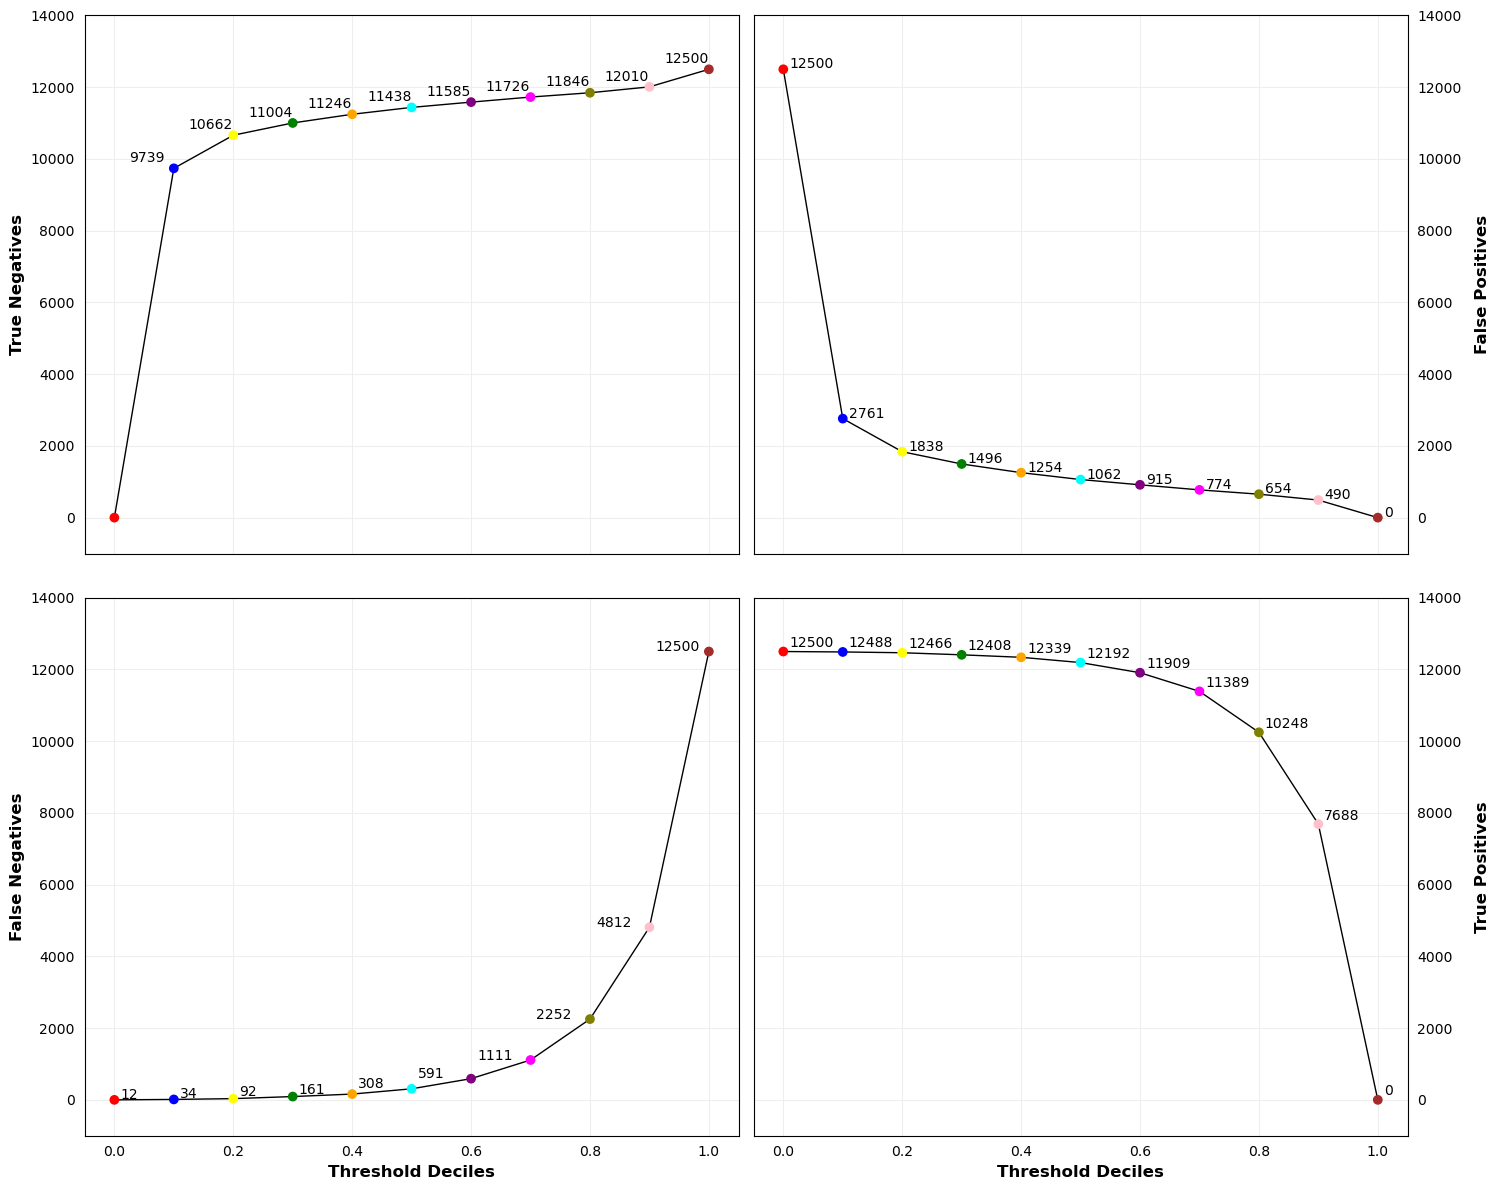

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50000, n_features=2, n_redundant=0,
n_clusters_per_class=2, weights=[0.50], flip_y=0, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
plot_cm_deciles(model, 
                X_train, 
                y_train, 
                population=13000, 
                y_lim_pad=1000, 
                tn_x_label=-.075,
                tn_y_label=.018,
                fn_x_label=-.09,
                fn_y_label= 1.1,
                fp_x_label=.01,
                fp_y_label=.01,
                tp_x_label=.01,
                tp_y_label=.01,
                y_lab_pad_right=-530, 
                plot_style='default', 
                output_type='decile_plot')